# Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
from sklearn.datasets import load_breast_cancer  # 여기에서 유방암 데이터 가져옴
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import graphviz   # 그래프 표현해주는 패키지
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [3]:
# PATH 설정: graphviz 경로를 설정. (윈도우 환경)
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

## 1) Data

#### -데이터 분석에 사용할 데이터를 Scikit learn으로부터 불러온다  
Breast_cancer Dataset  
Malignant(악성), Benign(양성)  
Dataset info LINK : https://scikit-learn.org/stable/datasets/index.html

#### -위스콘신대 유방암 진단 데이터(WDBC)
- class   : 2
- 샘플수 : 569개
- Feature : 32개 (ID, 진단결과, 30개의 실측값) 
- Samples per class : 212(M labeled '0'), 357(B, labeled '1')

-유방암 데이터로 악성(M), 양성(B) 판단하는 모델 만들기

In [4]:
cancer = load_breast_cancer()
print(cancer.keys())  # 데이터의 key들 확인
print(cancer)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [5]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [6]:
x=pd.DataFrame(cancer.data)
y=pd.Series(cancer.target)
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
# pandas에서 지원하는 함수 info() -> 각각의 컬럼들에 대한 정보, 컬럼들(30개 존재) / null개수도 세어줌
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [9]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [11]:
#컬럼명 덮어쓰기(x컬럼 바꿔주기)
x.columns = cancer.feature_names
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
# train data, test data 나누기
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=1234)

print(x_train.shape)  # 398개,30개의 feature
print(y_train.shape)
print(x_test.shape)   # 171개,30개의 feature
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


## 2) Model

### hyperparameter

#### (1)Criterion

In [14]:
model = DecisionTreeClassifier(criterion= 'gini', random_state=1234)  # 지니계수 사용
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [15]:
print(f'Train Accuracy: {model.score(x_train, y_train)}')
print(f'Test Accuracy: {model.score(x_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.9298245614035088


In [20]:
model_en = DecisionTreeClassifier(criterion= 'entropy' , random_state=1234)  # entropy는 gini와 성능은 똑같은데 계산량이 좀 더 많음
model_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [21]:
print(f'Train Accuracy: {model_en.score(x_train, y_train)}')
print(f'Test Accuracy: {model_en.score(x_test, y_test)}')  # 성능 gini와 완전 동일

Train Accuracy: 1.0
Test Accuracy: 0.9298245614035088


In [22]:
# model : 모델 데이터가 들어감
# out_file='tree.dot' : 이미지가 저장되는 경로 위치
# class_names, feature_names : 각각의 class와 feature 이름들
# impurity : 불순도 표현할건지, 안 할건지

graph_= export_graphviz(model, out_file='tree.dot', class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

# 트리 pdf파일로 저장
with open("tree.dot") as f:
    dot_graph = f.read()

graph = graphviz.Source(dot_graph)  # 그래프 읽어서 가져옴


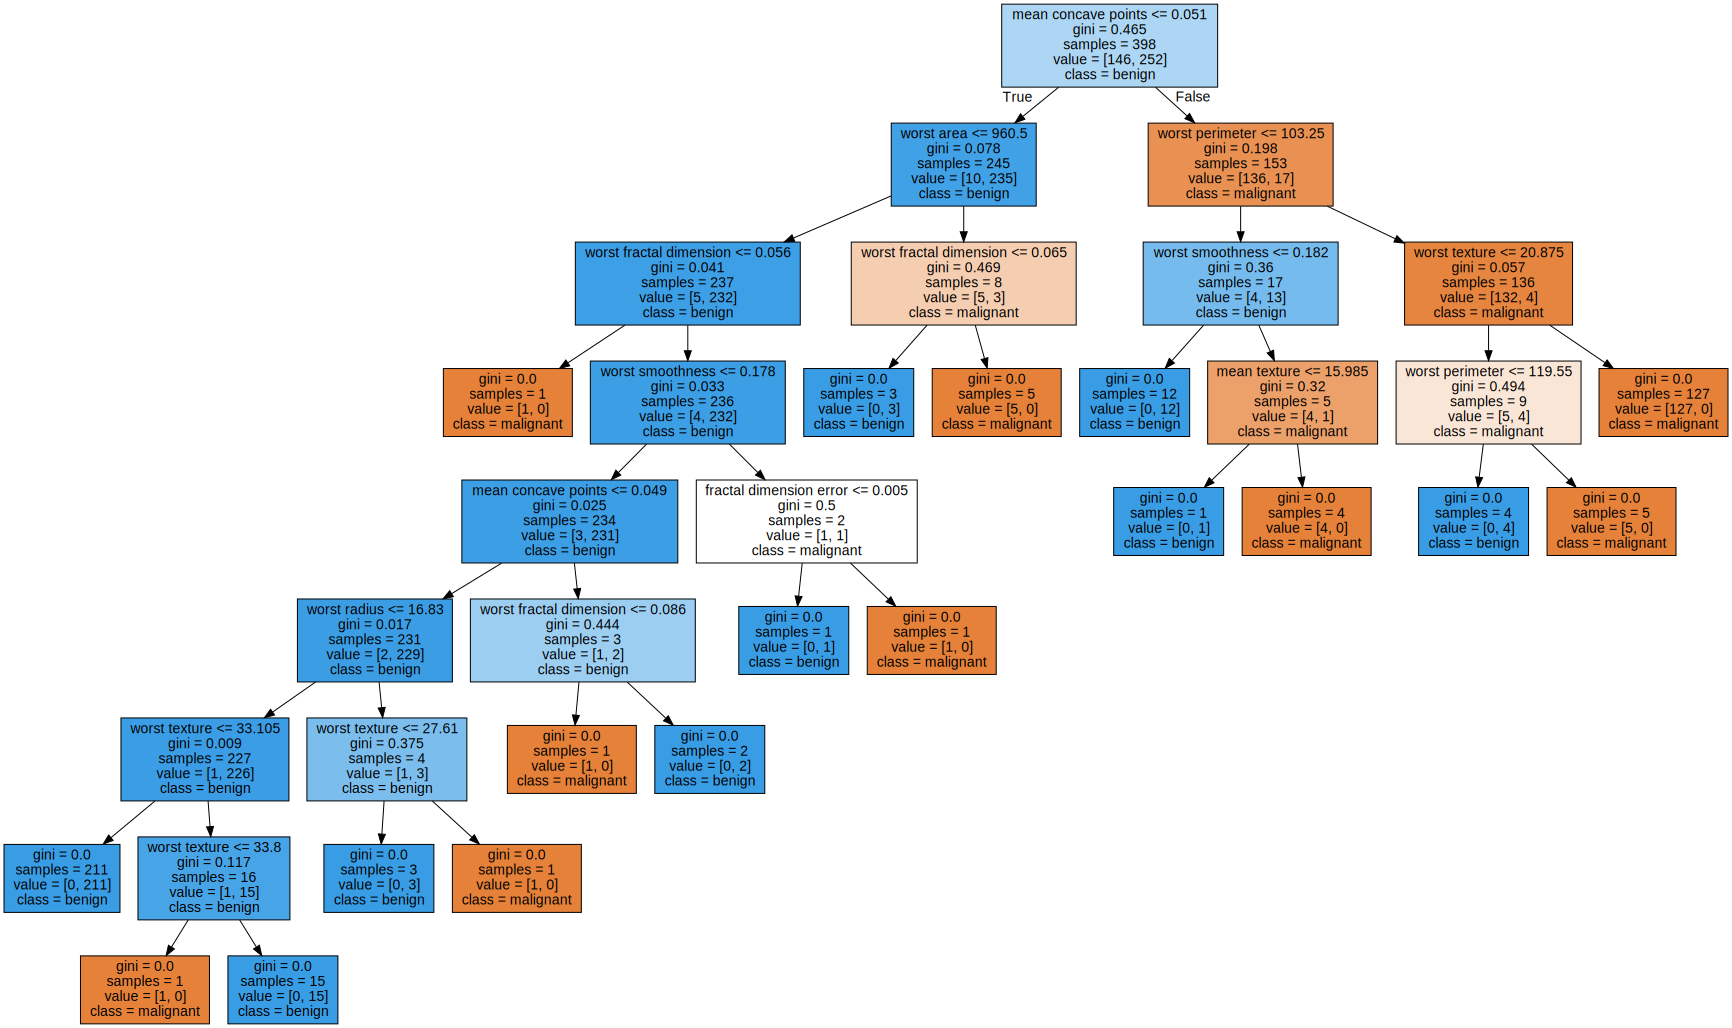

In [19]:
graph    # 지니계수가 낮아지는 방향으로 분류됨

# 아무조건을 안 주게 되면, 각각 하나씩(주황색) classification이 된다. -> 오버피팅이 많이 일어났다.라는 의미

#### (2) max_depth

In [23]:
# 오버피팅을 막는 첫번째 방법 max_depth : 전체 높이에 대한 제한을 주는것
model_depth = DecisionTreeClassifier(max_depth= 4, random_state=1234)  # 4로 높이를 제한
model_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [24]:
# train 데이터는 정확도가 조금 떨어졌지만, test데이터는 올라감(test정확도가 올라가는게 더 중요함)
print(f'Train Accuracy: {model_depth.score(x_train, y_train)}')
print(f'Test Accuracy: {model_depth.score(x_test, y_test)}')

Train Accuracy: 0.9899497487437185
Test Accuracy: 0.9415204678362573


In [25]:
graph_= export_graphviz(model_depth, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

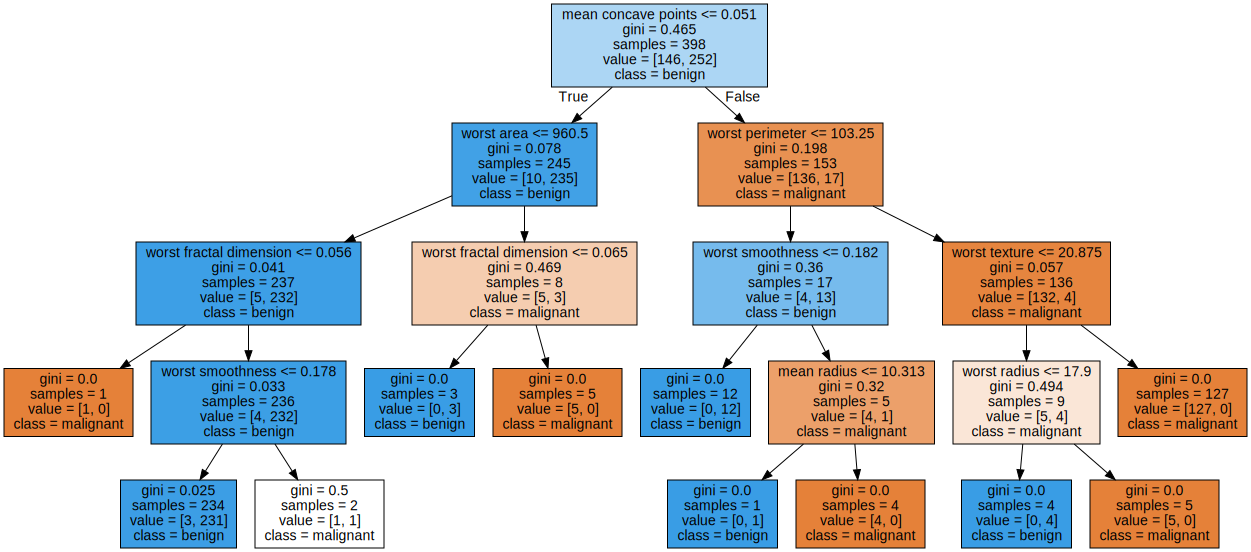

In [26]:
graph

#### (3)min_samples_split

In [31]:
# 오버피팅을 막는 두번째 방법 min_samples_split : 데이터를 분기할 때 samples의 개수에 제한을 두는 것
# 예를들어, samples의 개수를 10개를 잡았을 때, samples의 개수가 8개면 더이상 분기가 되지 않도록 해주는 것이다.
model_split = DecisionTreeClassifier(min_samples_split= 7, random_state=1234)
model_split.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=7, random_state=1234)

In [32]:
print(f'Train Accuracy: {model_split.score(x_train, y_train)}')
print(f'Test Accuracy: {model_split.score(x_test, y_test)}')   # test 정확도가 떨어진 것은 min_samples_split이 10인게 너무 과도하게 설정했다는 뜻이다.

Train Accuracy: 0.9899497487437185
Test Accuracy: 0.9415204678362573


In [33]:
graph_= export_graphviz(model_split, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

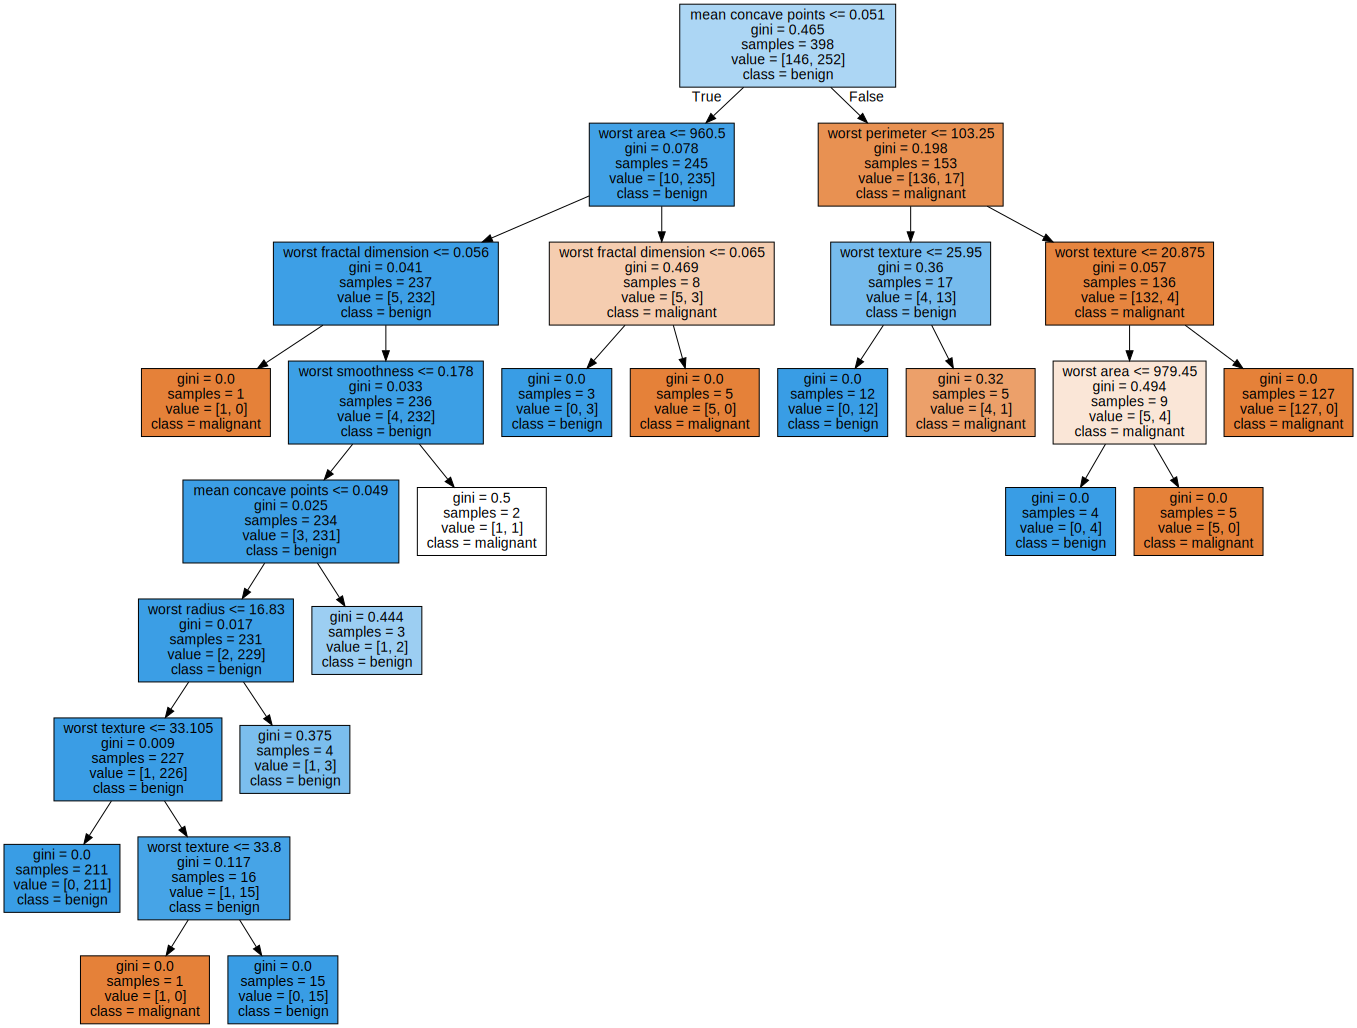

In [34]:
graph

#### (4)min_samples_leaf

In [35]:
# 맨 마지막에 있는 node를 leaf node라고 부른다.
# 오버피팅을 막는 세번째 방법 min_samples_leaf : leaf node 개수로 제한두는 것
model_leaf = DecisionTreeClassifier(min_samples_leaf= 2, random_state=1234)
model_leaf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=1234)

In [36]:
print(f'Train Accuracy: {model_leaf.score(x_train, y_train)}')
print(f'Test Accuracy: {model_leaf.score(x_test, y_test)}')

Train Accuracy: 0.9899497487437185
Test Accuracy: 0.9532163742690059


In [37]:
graph_= export_graphviz(model_leaf, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

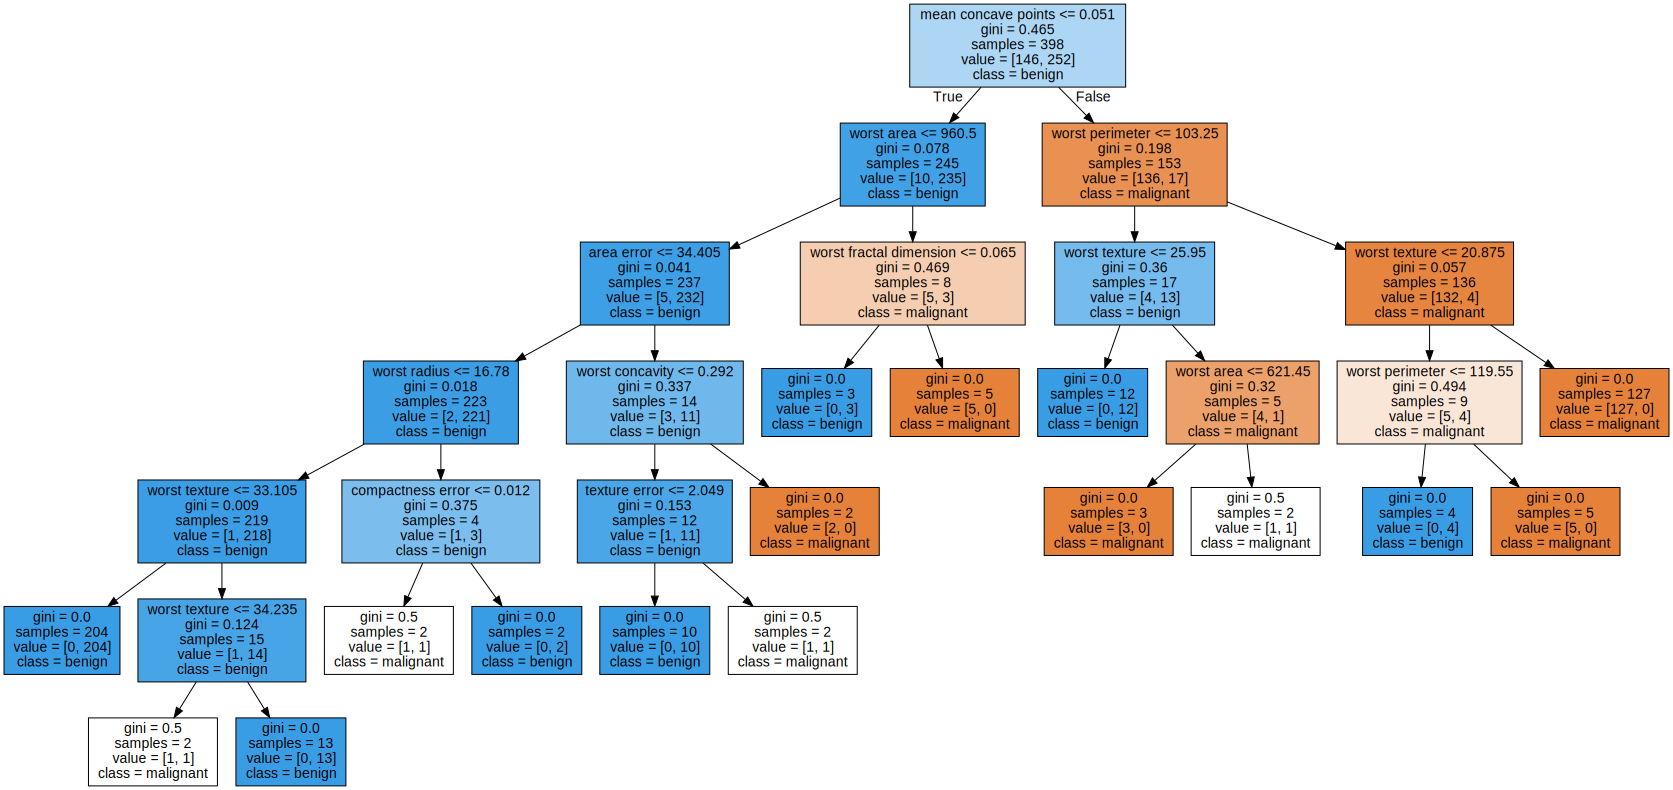

In [38]:
graph

#### (5)min_weight_fraction_leaf (Added in version 0.18)

In [49]:
# 오버피팅을 막는 네번째 방법 min_weight_fraction_leaf : leaf node 비율
# value에서 전체 데이터 개수에 대한 leaf node의 개수가 0.1보다 작은 경우에만 분기함 / 전체 데이터의 최소한 0.1만큼을 가지고 있는 leaf node여야 한다.
model_leaf = DecisionTreeClassifier(min_weight_fraction_leaf= 0.1, random_state=1234)
model_leaf.fit(x_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.1, random_state=1234)

In [50]:
print(f'Train Accuracy: {model_leaf.score(x_train, y_train)}')
print(f'Test Accuracy: {model_leaf.score(x_test, y_test)}')

Train Accuracy: 0.9321608040201005
Test Accuracy: 0.8771929824561403


In [51]:
graph_= export_graphviz(model_leaf, out_file=None, class_names= cancer.target_names, 
               feature_names= cancer.feature_names, impurity = True, filled= True) #filled :색구분

graph = graphviz.Source(graph_)

In [54]:
print(40/398)   # 0.1의 비율
print(80/398)

0.10050251256281408
0.20100502512562815


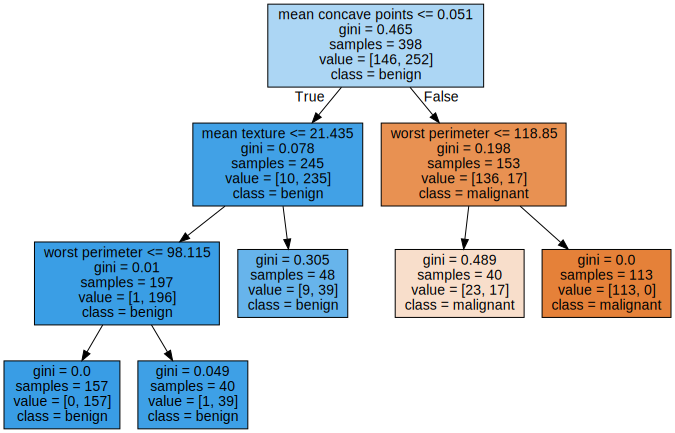

In [52]:
graph

## 3) 성능평가

In [55]:
pred_test = model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion = confusion_matrix(y_test, pred_test)
acc       = accuracy_score(y_test, pred_test)
prc       = precision_score(y_test, pred_test)
rec       = recall_score(y_test, pred_test)
f1s       = f1_score(y_test, pred_test)

print('<Confusion matrix>')
print(confusion)
print(f'Accuracy:{acc:.2f}, Precision: {prc:.2f}, Recall: {rec:.2f}, F1-score: {f1s:.2f}')

<Confusion matrix>
[[60  6]
 [ 6 99]]
Accuracy:0.93, Precision: 0.94, Recall: 0.94, F1-score: 0.94
